# **Loan Prediction Dataset ML Project**

In [2]:
pip install xgboost 

     -------------------------------------- 125.4/125.4 MB 3.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Detail

This dataset is named Loan Prediction Dataset data set. The dataset contains a set of 614 records under 13 attributes:  
The main objective for this dataset:  
Using machine learning techniques to predict loan status.  

target value (y): `Loan_Status`

## Libraries 

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(f"Loan dataset (row, col): {df.shape}")

Loan dataset (row, col): (614, 13)


## Data Cleaning

### i) Training data pre-processing

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

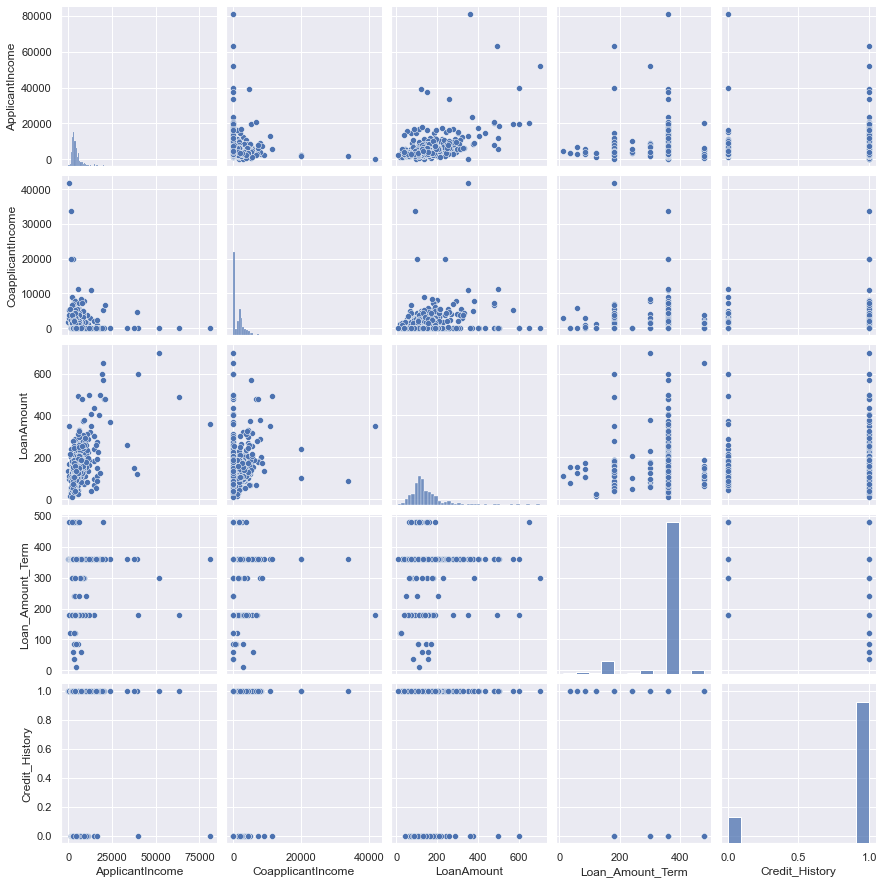

In [7]:
sns.pairplot(df)

## Above Pairplot gives an overview of all the `continous/ numeric variables`

In [8]:
df.info(verbose=True, null_counts=True) #total 614 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#summary statistics
df.describe() #just for numerical attributes/ columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Missing values  
As you can see we have some missing data, let's have a look how many we have for each column.  

Below there are 2 ways to deal with missing value attributes.  
`Step 1`: Drop features with more than 30% of their data missing.  
`Step 2`: Fill all the null values of a particular attribute with its mode.

<AxesSubplot:>

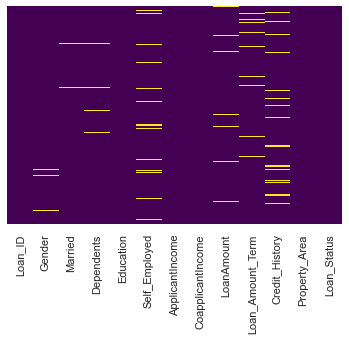

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #visualizing all null values

Here, we can see `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term`, and `Credit_History` got some null values.

In [11]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions

Credit_History       0.081433
Self_Employed        0.052117
LoanAmount           0.035831
Dependents           0.024430
Loan_Amount_Term     0.022801
Gender               0.021173
Married              0.004886
Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Above output shows, how much percentage of missing values present in every attribute. As none of the attribute got more than 30% missing values, so we will not drop any attribute here.

In [12]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)
print("\n\n Drop Features: ", len(drop_list))

[]


 Drop Features:  0


In [13]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Above output shows, count of missing values present in every attribute. 

## **Replacing missing values with `Mode`**  

### **Fixing missing values in `Credit_History`, `Self_Employed`, `LoanAmount`, `Dependents`,  `Loan_Amount_Term`,  `Gender`, & `Married`**  
Each value will be replaced by the most frequent value (mode) because `Credit_History` got just 2 unique values i.e. 0.0 & 1.0.  
For example,`Credit_History` has 50 null values and has 2 unique values 1.0 (475 times) or 0.0 (89 times) therefore each null value will be replaced by the mode (1.0), so count of 1.0 will be 525 times.

In [14]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{df[col].value_counts()}\n","-"*50)
    df[col] = df[col].fillna(
    df[col].dropna().mode().values[0] )   

    
df.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{df[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

<AxesSubplot:>

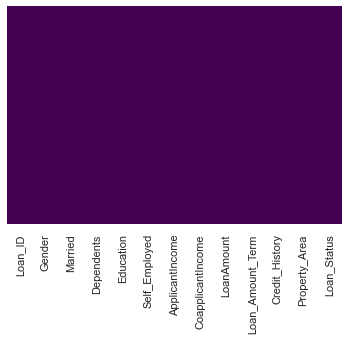

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Therefore, no null values present in the dataset now.

## Data visualization

### i)  `Loan_Status` distribution

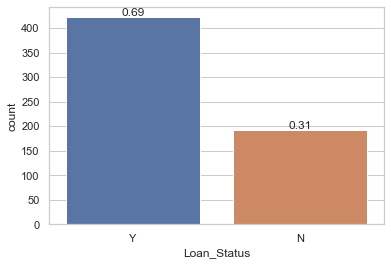

Y    422
N    192
Name: Loan_Status, dtype: int64
The percentage of Y class in Loan_Status : 0.69
The percentage of N class in Loan_Status : 0.31


In [16]:
total = float(len(df['Loan_Status']))
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(df['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

print(df['Loan_Status'].value_counts())
print('The percentage of Y class in Loan_Status : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class in Loan_Status : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

### ii)  `Credit_History` Vs `Loan_Status` distribution

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

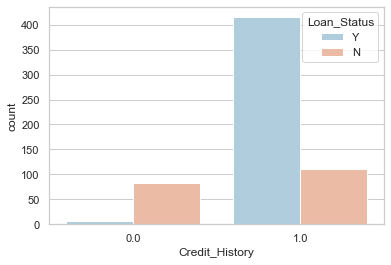

In [17]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df,palette='RdBu_r')

In [18]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

df_history_Y = df[df['Credit_History'] == 1]
df_history_N = df[df['Credit_History'] == 0]

perc_df_self_Y = df_history_Y['Loan_Status'].value_counts()['Y']/len(df_history_Y)
perc_df_self_N = df_history_N['Loan_Status'].value_counts()['Y']/len(df_history_N)

print('\n')

print('Percentage of loans approved among Credit_History 1.0 only: %.3f' %perc_df_self_Y) # 415/(110+415)
print('Percentage of loans approved among Credit_History 0.0 only: %.3f' %perc_df_self_N) # 7/(82+7)

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


Percentage of loans approved among Credit_History 1.0 only: 0.790
Percentage of loans approved among Credit_History 0.0 only: 0.079


In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Splitting our data to categorical and numerical data  
It eases the data visualization coding

In [20]:
num = df.select_dtypes('number').columns.to_list() #list of all the numeric columns

cat = df.select_dtypes('object').columns.to_list() #list of all the categoric columns

#numeric df
loan_num =  df[num]
#categoric df
loan_cat = df[cat]

In [21]:
loan_num.head() # got all numerical attributes

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [22]:
loan_cat.head() # got all categorical attributes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


## iii) `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, & `Credit_History` distributions   
###  `numeric df`/ `loan_num`  

###  `Numeric attributes`: We are plotting a `histogram` with `normal distribution curve` to identify the attribute's distribution & a `box plot` to figure out the `outliers`.  

In [23]:
loan_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

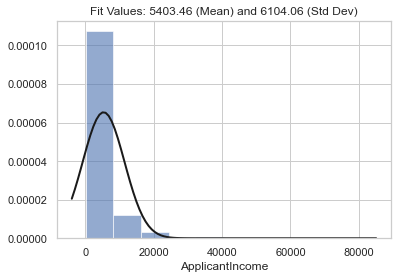

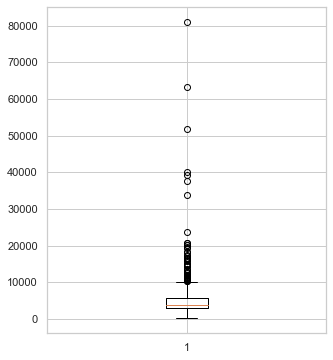

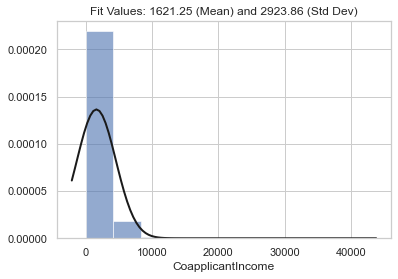

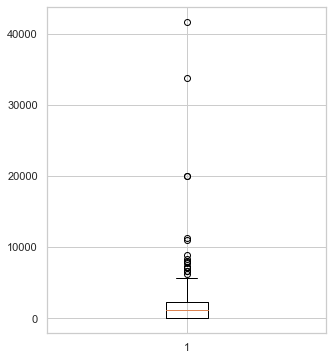

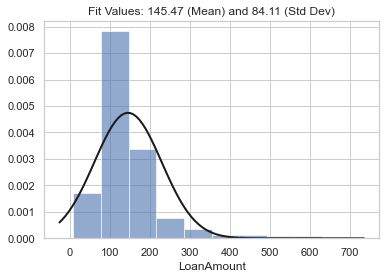

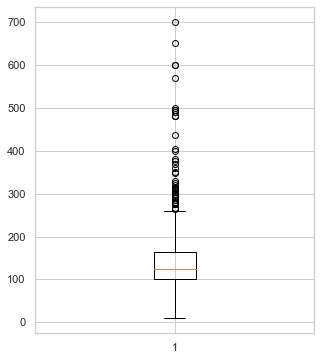

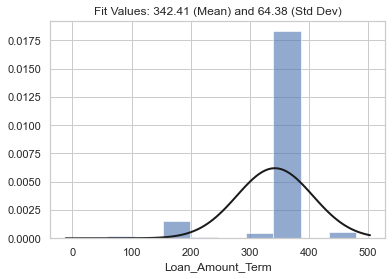

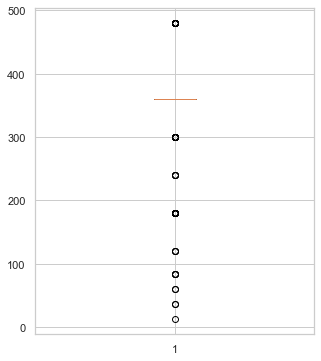

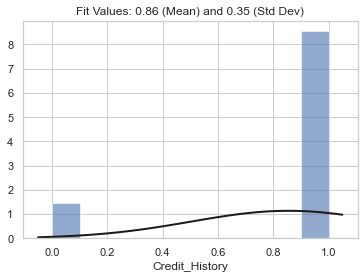

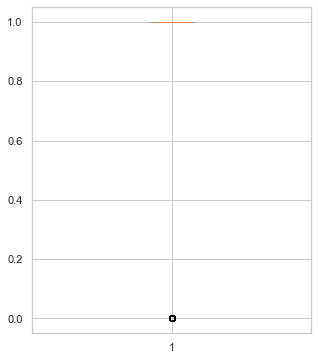

In [24]:
from scipy.stats import norm

for i in loan_num:
    # Fit a normal distribution to the data; mean and standard deviation
    mu, std = norm.fit(loan_num[i]) 
    
    plt.hist(loan_num[i], density=True, alpha=0.6, color='b') # plotting histogram 
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: {:.2f} (Mean) and {:.2f} (Std Dev)".format(mu, std)
    plt.title(title)
    plt.xlabel(i)
    
    fig = plt.figure(figsize =(5, 6))
    plt.boxplot(loan_num[i]) # Creating Box plot
    
    plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

## `Outliers removal code`

In [25]:
threshold = 0.1  # This number is a hyper parameter, by reducing it, more points are removed.
                 # You can just try different values, the deafult value is (1.5) it works good for most cases.
                 # Be careful, you don't want to try a small number because you may loss some important information from data.
                 # That's why I was surprised when 0.1 gived me the best result
            
ApplicantIncome_out = loan_num['ApplicantIncome']

q25, q75 = np.percentile(ApplicantIncome_out, 25), np.percentile(ApplicantIncome_out, 75) # Q25, Q75

print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in ApplicantIncome_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = loan_num
print('\nlen loan_num before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['ApplicantIncome'] > upper) | (data_outliers['ApplicantIncome'] < lower)].index)

print('len loan_num before dropping the outliers', len(data_outliers))

Quartile 25: 2877.5 , Quartile 75: 5795.0
iqr: 2917.5
Cut Off: 291.75
Lower: 2585.75
Upper: 6086.75
Nubers of Outliers: 248
outliers:[2583, 2333, 12841, 2500, 1853, 1299, 7660, 9560, 1442, 12500, 2275, 1828, 1800, 2400, 1928, 11500, 2132, 8080, 2500, 10750, 7100, 1875, 1000, 2395, 1378, 2366, 2500, 8566, 6250, 6782, 2484, 1977, 1759, 13650, 11417, 7333, 2071, 7451, 14583, 2214, 10408, 2137, 23803, 10513, 20166, 2014, 14999, 6950, 11757, 2330, 14866, 1538, 10000, 6277, 2577, 9166, 2281, 39999, 9538, 1863, 7933, 9323, 2439, 2237, 8000, 1820, 51763, 2045, 2333, 6400, 1916, 33846, 39147, 2178, 2383, 674, 9328, 12000, 8333, 1907, 11000, 2479, 10000, 7787, 150, 2221, 7578, 6250, 6250, 6400, 2491, 8333, 2510, 6250, 9703, 6608, 1809, 1668, 2583, 16250, 14683, 2060, 7200, 11146, 14583, 2301, 1811, 20667, 9508, 2383, 6875, 2014, 1800, 1625, 2000, 2400, 20233, 7667, 2507, 2473, 2058, 10000, 2400, 15000, 8666, 2500, 63337, 9833, 2500, 1830, 2378, 2583, 2499, 6333, 9083, 8750, 2423, 8333, 6822, 621

{'whiskers': [<matplotlib.lines.Line2D at 0x222b8ac00a0>,
 'caps': [<matplotlib.lines.Line2D at 0x222b8ac07c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x222b8ab1d60>],
 'medians': [<matplotlib.lines.Line2D at 0x222b8ac0ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x222b8acb2b0>],
 'means': []}

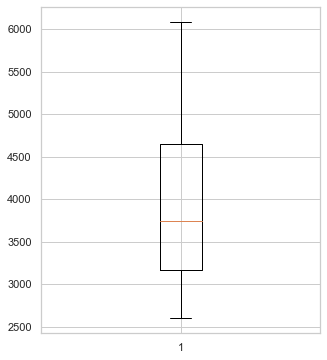

In [26]:
fig = plt.figure(figsize =(5, 6))
plt.boxplot(data_outliers['ApplicantIncome'])

### Here, we removed the outliers from `ApplicantIncome` attribute and it does not have any outlier now but we are not actually removing outliers from our main dataset because our data already got less records.   

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

## Interpretation using `Histograms` of Numerical variables' distribution:  
*   `ApplicantIncome` & `CoapplicantIncome` are `Right Skewed`.  
*   `LoanAmount` & `Loan_Amount_Term` are almost `Normally Distributed`.  
*   `Credit_History` is Bimodal as it got 2 unique values only.  

## Interpretation using `Box Plots` of Numerical variables' distribution:  
*   All the attributes got outliers, however we cannot delete the outliers here because our data already got less records. Besides, in case of dataset with high number of records we prefer to remove the outliers to make our ML model more accurate.    

## iv) `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status` distributions   
###  `categoric df`/ `loan_cat`  

Categorical (split by Loan status):  

In [27]:
loan_cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

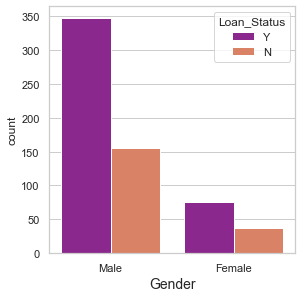

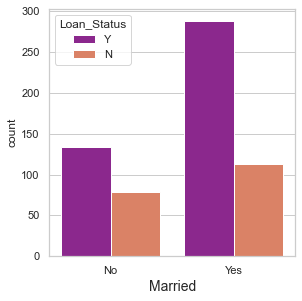

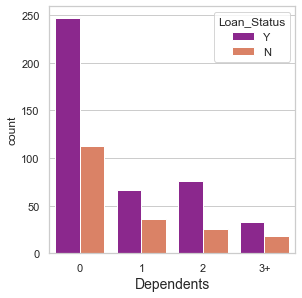

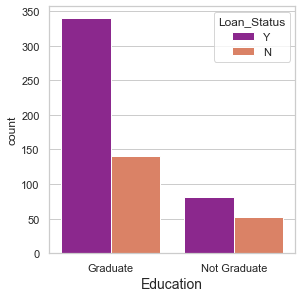

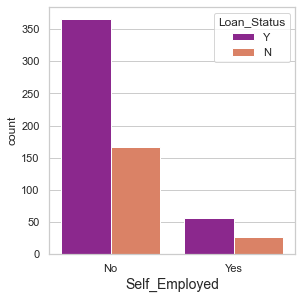

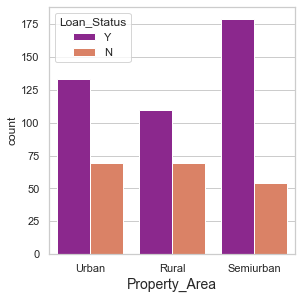

In [28]:
for i in cat[1:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

## Interpretation of Categorial variables' distribution:  
*   Most `males` got loan and most `females` got one too (No specific pattern in `Loan_Status vs Gender` Bar chart).  
*   Mostly `married applicants` got the loan approved, so `married applicants` got better chance to get a loan approved.  
*   If loan applicant got no `dependents` (Dependents = 0), then very hight chance of getting the loan approved. However, as number of dependents increases the chance of loan approval decreases.  
*   The level of `Education` (graduated/ not graduated) does not make a significant difference in loan approval, besides majority of loan applicants were Graduated that's why their loan approval count is high, however most of the loan applicants who did not graduate also got loan approved.  
*   `Self Employment` also does not make any difference in loan approval same as `Education`.  
*   As per `Property Area`, `Semiurban` Property_Area got almost 70% chance of loan approval followed by `Urban` Property_Area which got around 50% chance of loan approval.  


In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Encoding data to numeric

In [31]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to our dataset
df_numeric = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# the Dependents column
Dependents_ = pd.to_numeric(df_numeric.Dependents) # converting the Dependents column
df_numeric.drop(['Dependents'], axis = 1, inplace = True) # dropping the previous Dependents column
df_numeric = pd.concat([df_numeric, Dependents_], axis = 1) # concatination of the new Dependents column with both datasets

# checking our manipulated dataset for validation
print(f"Loan dataset (row, col): {df_numeric.shape}")
print(df_numeric.info())

Loan dataset (row, col): (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB
None


In [32]:
df_numeric

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,LP001002,1,2,1,2,5849,0.0,120.0,360.0,1.0,3,1,0
1,LP001003,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,LP001006,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,LP001008,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,1,0
610,LP002979,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,1,3
611,LP002983,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1,1
612,LP002984,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,1,2


In [33]:
df_numeric['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

## `Feature Engineering`  
 
### 1) Correlation matrix  

<AxesSubplot:>

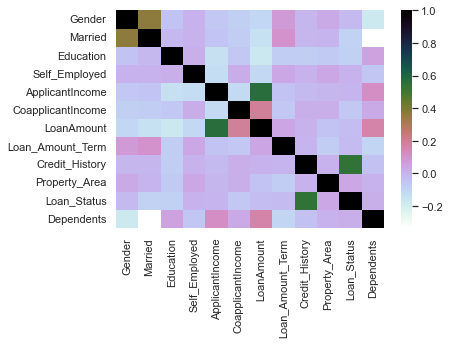

In [34]:
#plotting the correlation matrix
sns.heatmap(df_numeric.corr() ,cmap='cubehelix_r')

Correlation table for a more detailed analysis:

In [35]:
#correlation table
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


We can clearly see that:  
* `Credit_History` has the highest correlation of `0.54` with `Loan_Status`. Therefore, our `Loan_Status` is highly dependent on loan applicant's `Credit_History`.  
* There is a strong correlation between `LoanAmount` & `ApplicantIncome` of 0.56  
* Also there is a moderate correlation between `Married` & `Gender` of 0.36  
* However, `CoapplicantIncome`, `ApplicantIncome`, `Loan_Amount_Term`, `LoanAmount` are least correlated but we are not dropping them as our dataset got less number of records.

### 2) RFE (Recursive Feature Estimation)  
#### Sometimes RFE eliminates a good feature because of the unnormalised initial data.  

Since we have 11 features available, one part of building the best model will be to select which features to use as input to the classifier. Our initial model used all of the features but it is possible that a better model can be built by leaving some of them out. Test this by building a few models with subsets of the features - how do our models perform?  

This process can be automated. The sklearn RFE function implements **Recursive Feature Estimation** which removes features one by one, evaluating the model each time and selecting the best model for a target number of features. Use RFE to select features for a model with 3, 4 and 5 features - it's a good practice to see if we can build a model that is as good or better than our initial model (having all 11 attributes)?


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
y = df_numeric['Loan_Status']
X = df_numeric.drop(['Loan_Status', 'Loan_ID'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, shuffle=True, stratify=df_numeric['Loan_Status'])

model=LogisticRegression()
accuracies=[]

for n in list(range(3, 12)):
    rfe= RFE(estimator=model, n_features_to_select=n, step=1)
    rfe.fit(X_train,y_train)
    predictions=rfe.predict(X_test)
    accuracies.append(accuracy_score(y_test,predictions))
    
df_RFE = pd.DataFrame({'n features': list(range(3, 12)) ,'Accuracy':accuracies})
df_RFE

,n features,Accuracy
0,3,0.857143
1,4,0.857143
2,5,0.857143
3,6,0.857143
4,7,0.857143
5,8,0.857143
6,9,0.857143
7,10,0.863636
8,11,0.863636


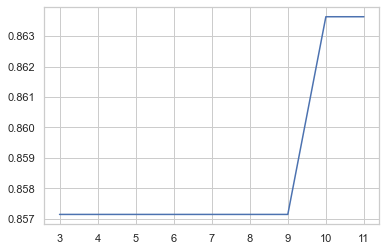

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.plot(list(range(3, 12)), accuracies);

In [39]:
print(rfe.support_)
print(X_train.columns)

[ True  True  True  True  True  True  True  True  True  True  True]
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Dependents'],
      dtype='object')


We can clearly see that:  
* `RFE` showed that accuracy was higher while selecting almost all the features (n = 10 or 11). Hence, we will not drop any attribute/ column from our dataset.    
* Even coordinating with `Correlation matrix's` results where we did not see any strong reason to drop any attribute.  

## Data Split  

Train & Test set  
First of all we will divide our dataset into two variables `X` as the features we defined earlier and `y` as the `Loan_Status` the target value we want to predict.

In [40]:
y = df_numeric['Loan_Status']
X = df_numeric.drop(['Loan_Status', 'Loan_ID'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, shuffle=True, stratify=df_numeric['Loan_Status'])

In [41]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# Though we used Stratify but it's good to cross-check the ratio of Target values i.e. Loan_status (0 & 1) in Train, Test and overall loan dataset
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df_numeric['Loan_Status'].value_counts().values/ len(df_numeric))

X_train shape (460, 11)
y_train shape (460,)
X_test shape (154, 11)
y_test shape (154,)

ratio of target in y_train : [0.68695652 0.31304348]
ratio of target in y_test : [0.68831169 0.31168831]
ratio of target in original_data : [0.68729642 0.31270358]


### Therefore, target values are splitted properly so we can start Modelling now.

# `Supervised Machine Learning` models  
* Decision Tree  
* Random Forest  
* XGBoost  
* Logistic Regression  
* Naive Bayes  
* SVM  
* KNN  

### **Decision Tree**

In [42]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        48
           1       0.81      0.78      0.80       106

    accuracy                           0.73       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

72.73% Accurate


#### Decision Tree --> Cross Validation (cv=5)  

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
DT_CV = scores.mean()
print("CV scores mean:- {}".format(DT_CV))

CV scores = [0.67391304 0.7173913  0.76086957 0.75       0.70652174]
CV scores mean:- 0.7217391304347827


### **Random Forest**

In [44]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.83      0.60      0.70        48
           1       0.84      0.94      0.89       106

    accuracy                           0.84       154
   macro avg       0.83      0.77      0.79       154
weighted avg       0.84      0.84      0.83       154

83.77% Accurate


#### Random Forest --> Cross Validation (cv=5)  

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
RF_CV = scores.mean()
print("CV scores mean:- {}".format(RF_CV))

CV scores = [0.67391304 0.80434783 0.80434783 0.76086957 0.72826087]
CV scores mean:- 0.7543478260869565


### **XGBoost**

In [46]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.85      0.88      0.86       106

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

80.52% Accurate


#### XGBoost --> Cross Validation (cv=5)  

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGB, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
XGB_CV = scores.mean()
print("CV scores mean:- {}".format(XGB_CV))

CV scores = [0.67391304 0.75       0.79347826 0.73913043 0.72826087]
CV scores mean:- 0.7369565217391304


### **Logistic Regression**

In [48]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        48
           1       0.84      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.79      0.82       154
weighted avg       0.88      0.86      0.85       154

accuracy is 0.8636363636363636


#### Logistic Regression --> Cross Validation (cv=5)  

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
LR_CV = scores.mean()
print("CV scores mean:- {}".format(LR_CV))

CV scores = [0.75       0.81521739 0.82608696 0.79347826 0.77173913]
CV scores mean:- 0.791304347826087


### **Naive Bayes**

In [50]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_predict = GNB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
GNB_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        48
           1       0.85      0.97      0.91       106

    accuracy                           0.86       154
   macro avg       0.88      0.80      0.82       154
weighted avg       0.87      0.86      0.86       154

accuracy is 0.8636363636363636


#### Naive Bayes --> Cross Validation (cv=5)  

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GNB, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
GNB_CV = scores.mean()
print("CV scores mean:- {}".format(GNB_CV))

CV scores = [0.73913043 0.7826087  0.77173913 0.79347826 0.7826087 ]
CV scores mean:- 0.773913043478261


### **SVM**

In [52]:
SVM = SVC()
SVM.fit(X_train, y_train)

y_predict = SVM.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
SVM_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.69      1.00      0.82       106

    accuracy                           0.69       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.47      0.69      0.56       154

accuracy is 0.6883116883116883


#### SVM --> Cross Validation (cv=5)  

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
SVM_CV = scores.mean()
print("CV scores mean:- {}".format(SVM_CV))

CV scores = [0.68478261 0.68478261 0.68478261 0.68478261 0.69565217]
CV scores mean:- 0.6869565217391305


### **KNN**

In [54]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
KNN_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.43      0.25      0.32        48
           1       0.71      0.85      0.78       106

    accuracy                           0.66       154
   macro avg       0.57      0.55      0.55       154
weighted avg       0.63      0.66      0.63       154

accuracy is 0.6623376623376623


#### KNN --> Cross Validation (cv=5)  

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, X_train, y_train, cv=5)
print("CV scores = " + str(scores))
KNN_CV = scores.mean()
print("CV scores mean:- {}".format(KNN_CV))

CV scores = [0.64130435 0.65217391 0.65217391 0.57608696 0.64130435]
CV scores mean:- 0.6326086956521739


In [57]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC, GNB_SC, SVM_SC, KNN_SC]
score_cv = [DT_CV,RF_CV,XGB_CV,LR_CV, GNB_CV, SVM_CV, KNN_CV]
Models = pd.DataFrame({
    'Supervised ML': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression", "Naive Bayes", "Support Vector Machine", "K nearest neighbour"],
    'Accuracy': score,
    'CV_Accuracy': score_cv})
Models.sort_values(by='Accuracy', ascending=False)

,Supervised ML,Accuracy,CV_Accuracy
3,Logistic Regression,0.863636,0.791304
4,Naive Bayes,0.863636,0.773913
1,Random Forest,0.837662,0.754348
2,XGBoost,0.805195,0.736957
0,Decision Tree,0.727273,0.721739
5,Support Vector Machine,0.688312,0.686957
6,K nearest neighbour,0.662338,0.632609


## Conclusion:  

* `Credit_History` is a crucial variable because of its high correlation with `Loan_Status`.  
  
* The `Logistic Regression` & `Naive Bayes` algorithm are the most accurate `Supervised ML` algorithms here: approximately 86%, besides `Logistic Regression` is more preferable as per Cross Validation scores.  

# `Unsupervised Machine Learning` models  
* Partitional algorithms 
* Hierarchical Clustering  

### Measuring Similarity  
* In order to find clusters in a data set we need to have some way of telling how similar two observations are to each other.  
* A cluster is a grouping of samples that are more similar to each other than they are to the samples in another cluster.  
* The first step in understanding clustering is understanding how to measure similarity.

### Similarity and Distance  
* The key to understanding similarity metrics is to think about measuring distance in the real world. When we graph a two dimensional data set, we get a layout of points on the plane. From this it is easy to see when two points are similar - they are close to each other on the graph.  
* In two dimensions, we can measure the distance between the points (x1,y1) and (x2,y2) using Pythagoras Theorem.  
  
   
Let's look at some data for describing loan approvals:

In [58]:
df_numeric.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,LP001002,1,2,1,2,5849,0.0,120.0,360.0,1.0,3,1,0
1,LP001003,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,LP001006,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,LP001008,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0


We could ask which is more similar to the "LP001002" - the "LP001003" or the "LP001005"?  

In [59]:
# drop the Loan_ID so that we just have the numerical columns
df_numericN = df_numeric.drop('Loan_ID', axis=1) 

A = df_numericN.loc[0]
B = df_numericN.loc[1]
C = df_numericN.loc[2]

# simple subtraction of two Series shows the difference
A-B

Gender                  0.0
Married                 1.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      1266.0
CoapplicantIncome   -1508.0
LoanAmount             -8.0
Loan_Amount_Term        0.0
Credit_History          0.0
Property_Area           2.0
Loan_Status             1.0
Dependents             -1.0
dtype: float64

In [60]:
# compute the sum of squares and take the square root
np.sqrt(np.square(A-B).sum()) 

1968.9822243991946

In [61]:
np.sqrt(np.square(A-C).sum())

2849.51206349438

Therefore, "LP001003" (B) is more similar to the "LP001002"(A) as compared to "LP001005"(C).

In [62]:
df_numeric.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.182410,1.346906,1.218241,1.866450,5403.459283,1621.245798,145.465798,342.410423,0.855049,2.037459,0.687296,0.744300
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973,1.009623
min,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,2.000000,1.000000,0.000000
75%,1.000000,2.000000,1.000000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000,3.000000


### Problem due to Unnormalised Variables   
* In this case, the units of each variable are quite different  
    *  `Credit_History` varies from 0 to 1  
    * `ApplicantIncome` from 150 to 81000  
    * `LoanAmount` from 9 to 700  
* this means that a difference in weight would dominate the other variables  
* solution is to normalise the data

#### **Initially plotting ApplicantIncome Vs Credit_History on different spaced axes**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

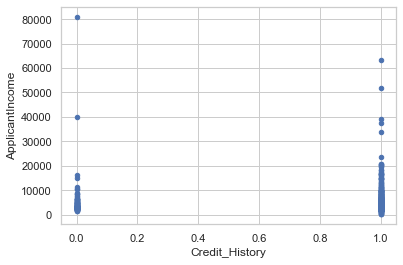

In [63]:
df_numericN.plot('Credit_History', 'ApplicantIncome', 'scatter') # ApplicantIncome Vs Credit_History

#### **Initially plotting ApplicantIncome Vs Credit_History on equally spaced axes**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 81000.0)

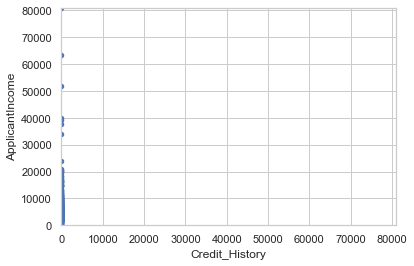

In [64]:
# plot again on equally spaced axes
df_numericN.plot('Credit_History', 'ApplicantIncome', 'scatter')
plt.ylim(0.0,81000.000000)
plt.xlim(0.0,81000.000000)

As we see, now it's tough to interpret the plot due to huge difference between the ranges of ApplicantIncome and Credit_History values. Hence, Normalising data would be beneficial.  

### Normalising Variables  
* normalise to make the mean and standard deviation the same for every variable  
* for each column:  
       * subtract the mean    
       * divide by the standard deviation  
* result is data with mean of 0, std of 1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(-2.6, 0.6)

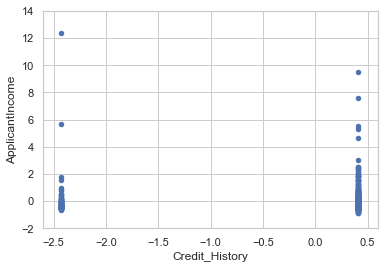

In [65]:
# subtract the mean, divide by the standard deviation
df_numeric_norm = (df_numericN-df_numericN.mean())/df_numericN.std()
df_numeric_norm.plot('Credit_History', 'ApplicantIncome', 'scatter')
plt.ylim(-2,14)
plt.xlim(-2.6,0.6) 

We can check `Data Normalisation` is done or not by again checking the similarity (distance) between "LP001002" - "LP001003" (A - B) & "LP001002" - "LP001003" (A-C).

In [66]:
df_numeric_norm.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,-0.471958,1.370972,-0.527932,0.392281,0.072931,-0.554036,-0.302513,0.273009,0.411397,1.222302,0.673970,-0.737205
1,-0.471958,-0.728222,-0.527932,0.392281,-0.134302,-0.038700,-0.207479,0.273009,0.411397,-1.317439,-1.481329,0.253263
2,-0.471958,-0.728222,-0.527932,-2.545042,-0.393427,-0.554036,-0.943988,0.273009,0.411397,1.222302,0.673970,-0.737205
3,-0.471958,-0.728222,1.891099,0.392281,-0.461686,0.251774,-0.302513,0.273009,0.411397,1.222302,0.673970,-0.737205
4,-0.471958,1.370972,-0.527932,0.392281,0.097649,-0.554036,-0.053050,0.273009,0.411397,1.222302,0.673970,-0.737205


In [67]:
print("Without normalisation:")
print("A -> B", np.sqrt(np.square(df_numericN.iloc[0]-df_numericN.iloc[1]).sum()))
print("A -> C", np.sqrt(np.square(df_numericN.iloc[0]-df_numericN.iloc[2]).sum()))
print("With normalisation:")
print("A -> B", np.sqrt(np.square(-df_numeric_norm.iloc[0]-df_numeric_norm.iloc[1]).sum()))
print("A -> C", np.sqrt(np.square(-df_numeric_norm.iloc[0]-df_numeric_norm.iloc[2]).sum()))

Without normalisation:
A -> B 1968.9822243991946
A -> C 2849.51206349438
With normalisation:
A -> B 2.3494444566776163
A -> C 4.569428218733059


Therefore, the results are still same but the data is normalised and easy to visualize & process in Clustering.

# Clustering  
Now that we can measure whether two samples are similar or different, we can begin to look at clustering. There are two main families of clustering method:  

* Partitional Algorithms  
* Hierarchical Algorithms  
  
Clustering is an example of unsupervised learning. Compared with linear/logistic regression (which are supervised) - to train those models we need to provide the true category labels to the training algorithm so that it can learn how to categorise the data.  
  
Clustering can be used in cases where regression cannot. If we don't have any true labels for the data, we can still use clustering to see if there are any natural groups in the data. This can be a really useful data exploration technique.

## Partitional algorithms  
Start with a random partition (split) of the data and try to refine it iteratively so that the partitions are better. They usually require that you nominate a fixed number of clusters to look for.  
  
## Hierarchical algorithms  
Organise the data into hierarchical (tree-like) structures where the most similar samples are grouped together, then similar groups are joined etc. This might be done **bottom-up** or **top-down**. The end result is a tree-like structure and these methods can be used when you don't know how many clusters there should be in the data.

## Partitional algorithm- KMeans Clustering   

The basic algorithm is:  

1. start with K randomly placed cluster centroids  
2. for each data point, assign it to the closest cluster centroid    
3. re-estimate the cluster centroids for each cluster based on the data points that belong to it  
4. if the centroid estimate has not changed significantly, stop, otherwise repeat from step 2.  

### Method Used  
  
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

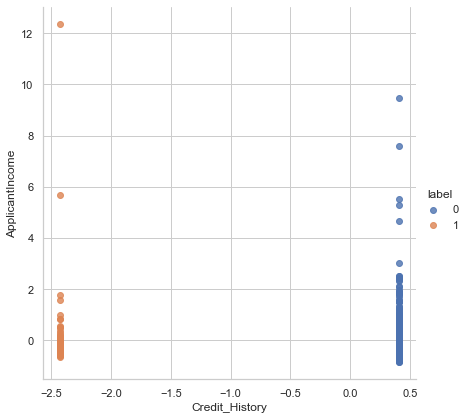

In [68]:
from sklearn.cluster import KMeans
# working on a copy of just a couple of variables
df = df_numeric_norm[['Credit_History', 'ApplicantIncome']].copy()

kmeans = KMeans(n_clusters=2) # passing 2 clusters because we know Credit_history got 2 unique values
kmeans.fit(df)
df['label'] = kmeans.predict(df)
sns.lmplot('Credit_History', 'ApplicantIncome', data=df, fit_reg=False, hue='label', height=6)

Above code applied **K means clustering** on the dataset **df** which got just two attributes i.e. 'Credit_History', & 'ApplicantIncome'; also it classified data into **label 0** & **label 1**  

In [69]:
df.head()

,Credit_History,ApplicantIncome,label
0,0.411397,0.072931,0
1,0.411397,-0.134302,0
2,0.411397,-0.393427,0
3,0.411397,-0.461686,0
4,0.411397,0.097649,0


In [70]:
df.tail()

,Credit_History,ApplicantIncome,label
609,0.411397,-0.409796,0
610,0.411397,-0.212383,0
611,0.411397,0.436818,0
612,0.411397,0.356773,0
613,-2.426782,-0.134302,1


### what are the clusters?  
**i) label 0**

In [71]:
df_numeric[ df['label'] == 0].head() 

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,LP001002,1,2,1,2,5849,0.0,120.0,360.0,1.0,3,1,0
1,LP001003,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,LP001006,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,LP001008,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0


In [72]:
df_numeric[ df['label'] == 0]['Credit_History'].value_counts()

1.0    525
Name: Credit_History, dtype: int64

**ii) label 1**

In [73]:
df_numeric[ df['label'] == 1].head() 

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
7,LP001014,1,1,1,2,3036,2504.0,158.0,360.0,0.0,2,0,3
17,LP001036,2,2,1,2,3510,0.0,76.0,360.0,0.0,3,0,0
20,LP001043,1,1,2,2,7660,0.0,104.0,360.0,0.0,3,0,0
22,LP001047,1,1,2,2,2600,1911.0,116.0,360.0,0.0,2,0,0
23,LP001050,1,1,2,2,3365,1917.0,112.0,360.0,0.0,1,0,2


In [74]:
df_numeric[ df['label'] == 1]['Credit_History'].value_counts()

0.0    89
Name: Credit_History, dtype: int64

### Evaluating the model accuracy by masking with `Credit_History`  

In [75]:
# The following lines of code will match the learned cluster labels with the true labels found in them −
from scipy.stats import mode
labels = np.zeros_like(df['label'])
for i in range(2):
   mask = (df['label'] == i)
   labels[mask] = mode(df_numeric['Credit_History'][mask])[0]

In [76]:
# Next, we can check the accuracy as follows
from sklearn.metrics import accuracy_score
accuracy_score(df_numeric['Credit_History'], labels)

1.0

So, Unsupervised Learning made a 100% accuracy with using just 2 attributes.  

## Conclusion:  
* Clustering works well with normalised data.  
* Clustering is nothing actually measuring the distance between data points and cluster the closest ones to a centroid.  
* Clustering creates labels (0,1,2,...) used to recognize the groups.  
* Initially, we can provide random K-value to Clustering and check the accuracy, however number of distinct values available in an attribute/ column would be the best value of K.     

### Some problems with KMeans Clustering
* Need to define the number of clusters
* Initial cluster centriods are arbitrary
       *   choose K random points within the distribution
       *   choose K data points
       *   choose K data points that are maximally distinct
* Choice of centriods can affect the outcome
* There are variations on KMeans that give improved outcomes in some problems

## Best example of K-means clustering  
If we got `Opal Train data` with lots of attributes and we wanna find some meaningful insights.  
We can use distinct `suburb` and `tap-on time` attributes and can give number of clusters (n) as total count of distinct suburbs or total count of hours in a day (24). Finally, we will get the data clustered as different suburbs with tap-on timings & we can find:  
i) which suburb got the most tap-ons  
ii) At what time the trains started being busy the most  
